In [1]:
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [3]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x
    
model = MNISTModel().to(device)

In [4]:
# Load MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5,), (0.5,))]
)

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=4, shuffle=False)

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train
for epoch in range(10):
    model.train(True)
    for batch_idx, data in enumerate(train_loader):

        inputs, labels = data

        optimizer.zero_grad()

        output = model(inputs)

        loss = loss_fn(output, labels)
        loss.backward()

        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.2578650712966919
Epoch 2, Loss: 7.166615978349e-05
Epoch 3, Loss: 0.06458990275859833
Epoch 4, Loss: 0.002154930494725704
Epoch 5, Loss: 0.01413679774850607
Epoch 6, Loss: 0.0007039917400106788
Epoch 7, Loss: 0.001981335459277034
Epoch 8, Loss: 0.010870570316910744
Epoch 9, Loss: 0.8318904638290405
Epoch 10, Loss: 1.1233336925506592


In [ ]:
# Evaluate the model (Testing Accuracy)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 96.33%


In [24]:
# Evaluate the model (Training Accuracy)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in train_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
print(f'Training Accuracy: {100 * correct / total}%')

Training Accuracy: 96.955%


In [9]:
torch.save(model.state_dict(), 'model.pth')

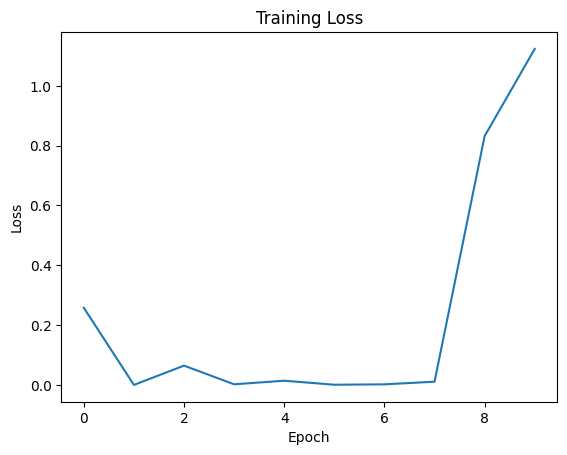

In [11]:
training_loss = [0.2578650712966919, 7.166615978349e-05, 0.06458990275859833, 0.002154930494725704, 0.01413679774850607, 0.0007039917400106788, 0.001981335459277034, 0.010870570316910744, 0.8318904638290405, 1.1233336925506592]

# Plot training loss vs epoch
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

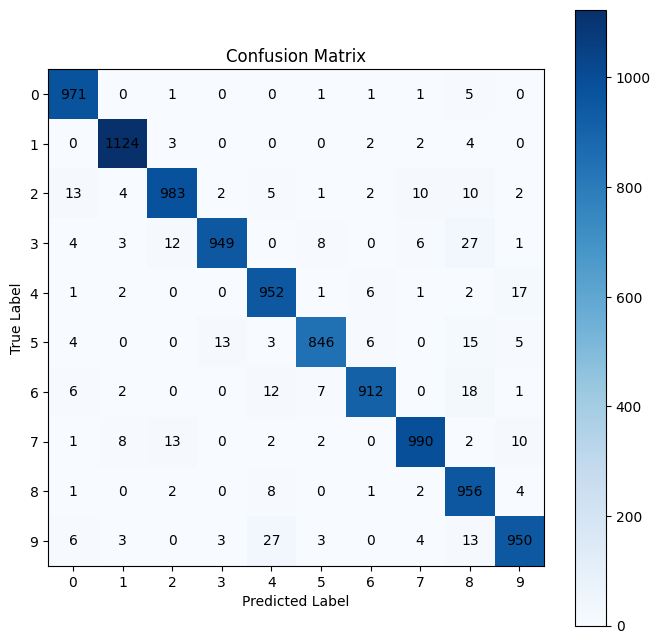

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

model.eval()

y_pred = []
y_true = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(target.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(10), labels=np.arange(10))
plt.yticks(np.arange(10), labels=np.arange(10))

for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()